In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

#### Constants

In [20]:
MAX_SUPPLY = 10_000_000_000

# Token Distribution
DISTRIBUTION = {
    "Seed Sales": 9,
    "Private Sales": 15.1,
    "Public Sales": 11.8,
    "Team": 15,
    "Foundation": 20,
    "Community & Ecosystem": 28.4,
    "Exchange Security Deposit": 0.65
}


#### Function to calculate vesting schedule

In [21]:
def calculate_vesting_schedule(tge_percentage, vesting_months, cliff_months):
    pre_seed_allocation = TOTAL_SUPPLY * (DISTRIBUTION["Seed Sales"] / 100)
    tge_unlocked_tokens = pre_seed_allocation * (tge_percentage / 100)
    monthly_vesting_tokens = (pre_seed_allocation - tge_unlocked_tokens) / vesting_months

    months = np.arange(0, vesting_months + cliff_months + 1)
    tokens = np.zeros_like(months, dtype=float)
    tokens[0] = tge_unlocked_tokens
    tokens[cliff_months + 1:] = monthly_vesting_tokens

    df = pd.DataFrame({
        'Month': months,
        'Tokens Unlocked': tokens,
        'Cumulative Tokens': np.cumsum(tokens)
    })
    
    return df


#### Plot the vesting schedule

In [22]:
# Function to plot vesting schedule
def plot_vesting_schedule(tge_percentage, vesting_months, cliff_months):
    df = calculate_vesting_schedule(tge_percentage, vesting_months, cliff_months)
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['Month'], df['Cumulative Tokens'], marker='o', linestyle='-', color='b')
    plt.title('DeGym Pre-Seed Token Vesting Schedule')
    plt.xlabel('Month')
    plt.ylabel('Cumulative Tokens Unlocked')
    plt.xticks(df['Month'])
    plt.grid(True)
    plt.show()
    
    display(df)

# Function to plot token distribution
def plot_token_distribution():
    labels = list(DISTRIBUTION.keys())
    sizes = list(DISTRIBUTION.values())
    
    plt.figure(figsize=(12, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('DeGym Token Distribution')
    plt.show()

### Plot token distribution

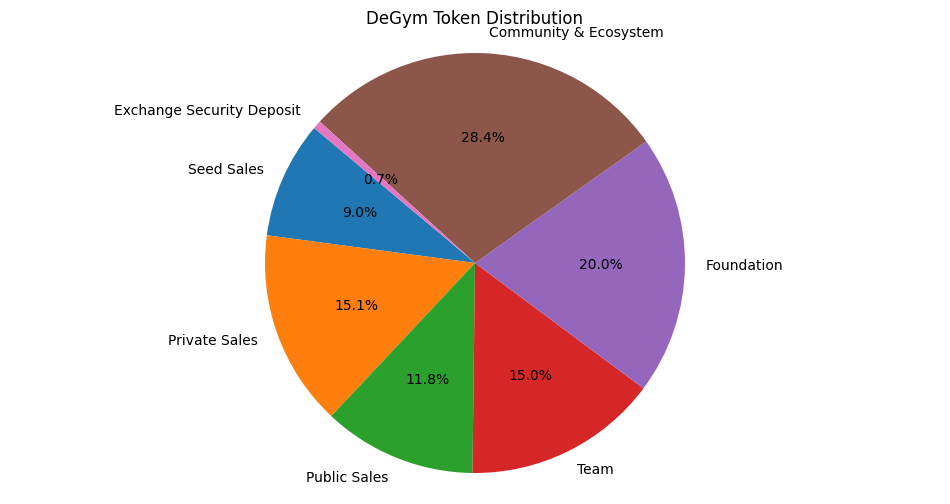

In [23]:
plot_token_distribution()

### Interactive widget for vesting schedule

In [24]:
interact(plot_vesting_schedule,
         tge_percentage=widgets.IntSlider(min=0, max=100, step=5, value=10, description='TGE %'),
         vesting_months=widgets.IntSlider(min=1, max=24, step=1, value=12, description='Vesting Months'),
         cliff_months=widgets.IntSlider(min=0, max=12, step=1, value=3, description='Cliff Months')
        );


interactive(children=(IntSlider(value=10, description='TGE %', step=5), IntSlider(value=12, description='Vesti…